<a href="https://colab.research.google.com/github/santiago-ruiz27/Actividad4IA/blob/main/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Creación de datos Estaciones
np.random.seed(42)
n_estaciones = 50

data = {
    'estacion_id': range(1, n_estaciones + 1),
    'pasajeros_por_hora': np.random.randint(100, 5000, n_estaciones),
    'tiempo_espera_promedio': np.random.uniform(2, 15, n_estaciones),
    'conectividad_rutas': np.random.randint(1, 10, n_estaciones)
}

df_clustering = pd.DataFrame(data)
df_clustering.to_csv('comportamiento_estaciones.csv', index=False)

print("Dataset 'comportamiento_estaciones.csv' generado.")
print(df_clustering.head())

Dataset 'comportamiento_estaciones.csv' generado.
   estacion_id  pasajeros_por_hora  tiempo_espera_promedio  conectividad_rutas
0            1                 960                2.447051                   1
1            2                3872               13.821165                   5
2            3                3192                5.364140                   7
3            4                 566               10.612790                   7
4            5                4526                6.052244                   9


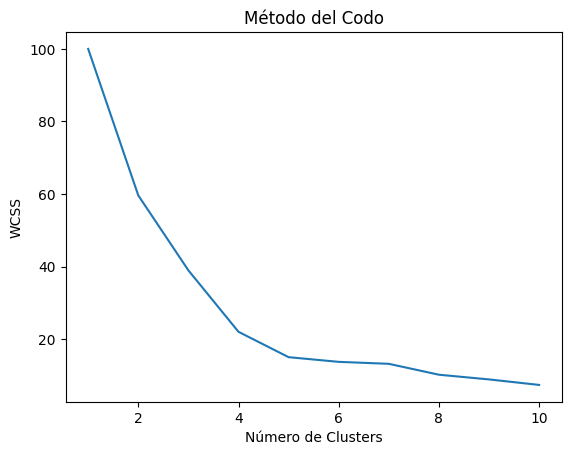

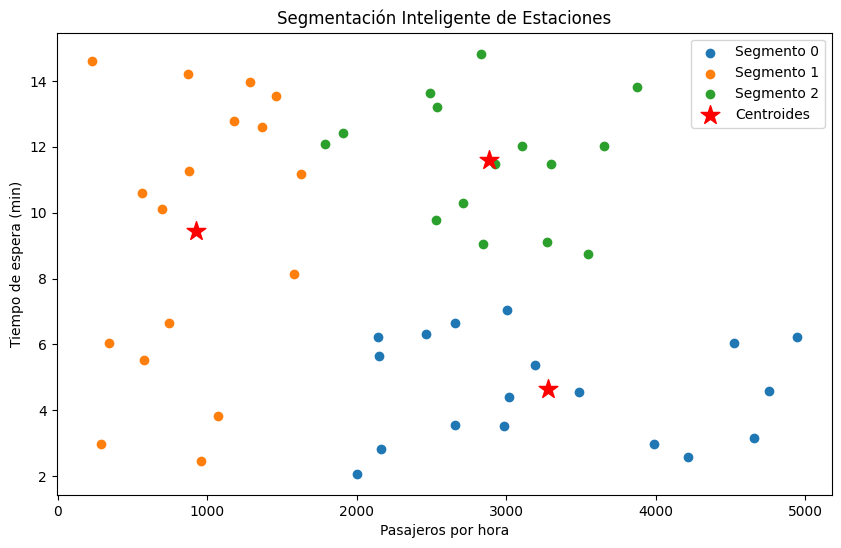

In [6]:
# MODELO DE APRENDIZAJE NO SUPERVISADO

# Queremos agrupar estaciones por Pasajeros vs Tiempo de Espera
X = df_clustering[['pasajeros_por_hora', 'tiempo_espera_promedio']]

#  Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# MÉTODO DEL CODO para hallar el número de clusters en el caso (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Entrenamiento del modelo suponiendo k=3
k = 3
model_kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df_clustering['cluster'] = model_kmeans.fit_predict(X_scaled)

# Visualización del resultado
plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green']
for i in range(k):
    cluster_data = df_clustering[df_clustering['cluster'] == i]
    plt.scatter(cluster_data['pasajeros_por_hora'],
                cluster_data['tiempo_espera_promedio'],
                label=f'Segmento {i}')

plt.scatter(model_kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            model_kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=200, c='red', marker='*', label='Centroides')

plt.title('Segmentación Inteligente de Estaciones')
plt.xlabel('Pasajeros por hora')
plt.ylabel('Tiempo de espera (min)')
plt.legend()
plt.show()